### MapMyRun Data

Import Packages

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [2]:
import pandas as pd
import seaborn as sns
sns.set()
temp = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')
temp.head(2)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,"May 11, 2022","May 11, 2022",Run,656,5.00117,2989,9.95615,1.083180,6.02642,55.3924,146.0,7917.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6570492340
1,"May 9, 2022","May 9, 2022",Run,391,3.10777,1802,9.65751,0.935857,6.21278,64.1124,140.0,4782.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6565419007


In [27]:
import pandas as pd
headers_dict = {'Workout Date': 'Workout_Date', 'Avg Pace (min/mi)': 'Avg_Pace', 'Distance (mi)':'Distance', 'Avg Speed (mi/h)':'Avg_Speed', 'Avg Heart Rate':'Avg_Heart_Rate', 'Calories Burned (kCal)':'Calories_Burned', 'Workout Time (seconds)': 'Workout_Time', 'Max Pace (min/mi)':'Max_Pace', 'Max Pace':'Max_Pace', 'Date Submitted':'Date_Submitted', 'Activity Type':'Activity_Type', 'Max Speed (mi/h)':'Max_Speed'}
temp.rename(columns = headers_dict, inplace=True)

In [28]:
temp['Workout_Date'] = pd.to_datetime(temp['Workout_Date'])
temp['Date_Submitted'] = pd.to_datetime(temp['Date_Submitted'])
#mean_value = temp['Avg_Heart_Rate'].mean()
#temp['Avg_Heart_Rate'].fillna(value = mean_value, inplace = True)

#step_value = temp['Steps'].mean()
#temp['Steps'].fillna(value = step_value, inplace = True)

temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Submitted   664 non-null    datetime64[ns]
 1   Workout_Date     664 non-null    datetime64[ns]
 2   Activity_Type    664 non-null    object        
 3   Calories_Burned  664 non-null    int64         
 4   Distance         664 non-null    float64       
 5   Workout_Time     664 non-null    int64         
 6   Avg_Pace         664 non-null    float64       
 7   Max_Pace         664 non-null    float64       
 8   Avg_Speed        664 non-null    float64       
 9   Max_Speed        664 non-null    float64       
 10  Avg_Heart_Rate   438 non-null    float64       
 11  Steps            640 non-null    float64       
 12  Notes            664 non-null    object        
 13  Source           664 non-null    object        
 14  Link             664 non-null    object   

In [29]:
temp[temp.Avg_Heart_Rate == 0] = np.nan
#temp[temp.Max_Pace == 0] = np.nan


In [30]:
temp.fillna(temp.Avg_Heart_Rate.median(), inplace = True)
#temp.fillna(temp.Max_Pace.median(), inplace = True)
temp.head()

,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Notes,Source,Link
0,2022-05-11 00:00:00,2022-05-11 00:00:00,Run,656.0,5.00117,2989.0,9.95615,1.083180,6.02642,55.3924,146.0,7917.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6570492340
1,2022-05-09 00:00:00,2022-05-09 00:00:00,Run,391.0,3.10777,1802.0,9.65751,0.935857,6.21278,64.1124,140.0,4782.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6565419007
2,2022-05-08 00:00:00,2022-05-08 00:00:00,Run,313.0,2.35281,1376.0,9.73759,1.029330,6.16169,58.2904,156.0,3622.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6564195706
3,2022-05-07 00:00:00,2022-05-07 00:00:00,Run,348.0,2.59009,1516.0,9.74739,0.425582,6.15549,140.9830,154.0,4043.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6562162405
4,2022-05-07 00:00:00,2022-05-07 00:00:00,Run,430.0,3.10000,1974.0,10.61290,0.000000,5.65350,0.0000,149.0,5197.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6560917507


In [31]:
temp_df = pd.DataFrame(temp)
temp_df.drop(['Notes', 'Source', 'Link'], axis = 1, inplace = True)
temp_df.rename(columns = headers_dict, inplace=True)
upd = temp_df.round(2)
upd2 =upd
upd3 = upd2[upd2['Avg_Pace'] > 7]
upd4 = upd3[upd3['Avg_Speed'] > 3]
upd4.sort_values(by=['Max_Pace'], ascending=True)
upd5 = upd4[upd4['Avg_Pace'] < 13]
df = upd5[upd5['Activity_Type'] == 'Run']
df['Calculated'] = df['Workout_Time'] / 60
df.count()

Date_Submitted     433
Workout_Date       433
Activity_Type      433
Calories_Burned    433
Distance           433
Workout_Time       433
Avg_Pace           433
Max_Pace           433
Avg_Speed          433
Max_Speed          433
Avg_Heart_Rate     433
Steps              433
Calculated         433
dtype: int64

In [32]:
df['Workout_Date'] = pd.to_datetime(df['Workout_Date'])

df.sort_values(by=['Workout_Date'], ascending=False)

,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
0,2022-05-11 00:00:00,2022-05-11,Run,656.0,5.00,2989.0,9.96,1.08,6.03,55.39,146.0,7917.0,49.816667
1,2022-05-09 00:00:00,2022-05-09,Run,391.0,3.11,1802.0,9.66,0.94,6.21,64.11,140.0,4782.0,30.033333
2,2022-05-08 00:00:00,2022-05-08,Run,313.0,2.35,1376.0,9.74,1.03,6.16,58.29,156.0,3622.0,22.933333
3,2022-05-07 00:00:00,2022-05-07,Run,348.0,2.59,1516.0,9.75,0.43,6.16,140.98,154.0,4043.0,25.266667
4,2022-05-07 00:00:00,2022-05-07,Run,430.0,3.10,1974.0,10.61,0.00,5.65,0.00,149.0,5197.0,32.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,2019-07-05 00:00:00,2019-07-05,Run,156.0,1.52,843.0,9.24,0.85,6.49,71.00,160.0,2313.0,14.050000
618,2019-07-04 00:00:00,2019-07-04,Run,156.0,1.53,816.0,8.88,0.99,6.76,60.91,159.0,2215.0,13.600000
621,2019-07-02 00:00:00,2019-07-02,Run,95.0,1.02,552.0,9.02,0.34,6.65,174.52,148.0,1439.0,9.200000
626,2019-06-29 00:00:00,2019-06-29,Run,118.0,1.27,693.0,9.13,3.32,6.57,18.06,150.0,1824.0,11.550000


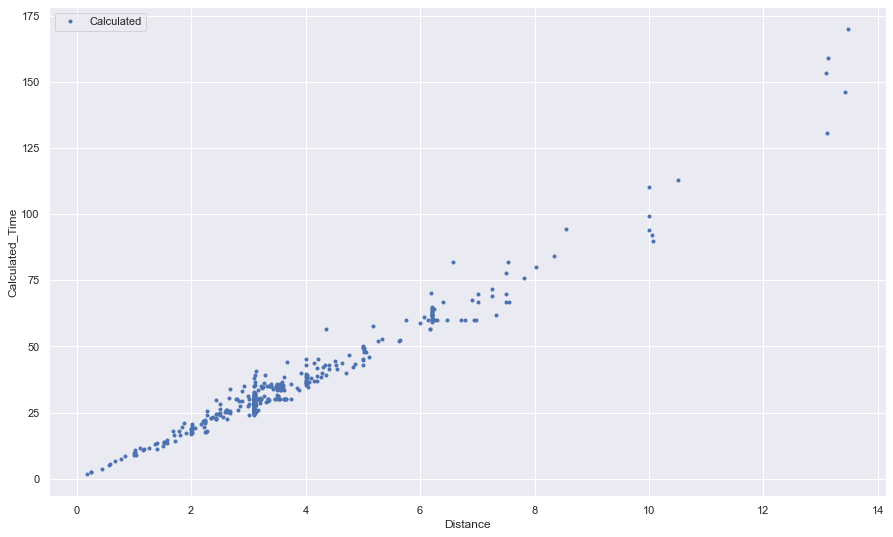

In [34]:

axes = df.plot(x='Distance', y='Calculated', style='.',figsize=(15,9))
y_label = axes.set_ylabel('Calculated_Time')

In [125]:
from scipy import stats

In [126]:
linear_regression = stats.linregress(x=df.Calculated,y=df.Distance)

In [127]:
linear_regression.slope

0.09152314014681964

In [128]:
linear_regression.intercept

0.4187949048721973

* We can use these values with the simple linear regression equation for a straight line to predict the average January temperature in New York City for any given year.
* In the following calculation, `linear_regression.slope` is **_m_**, our input year is **_x_** (the date value for which you’d like to predict the temperature), and `linear_regression.intercept` is **_b_**.
* We can also predict the approximate difference between one year and another.

In [129]:
#The average temperature in New York was just under 40 this year, so pretty close
Half = linear_regression.slope * 13.1 + linear_regression.intercept 
print(Half) 


1.6177480407955345


In [130]:
Full = linear_regression.slope * 26.2 + linear_regression.intercept
print(Full-Half)

1.1989531359233372


### Plotting the Average High Temperatures and a Regression Line
* Seaborn’s **`regplot` function** plots each data point with one attribute on the **_x_****-axis and the other on the **_y_**-axis
* Creates a **scatter plot** or **scattergram** representing the `Temperature`s for the given `Date`s and adds the regression line
* Function `regplot`’s `x` and `y` keyword arguments are one-dimensional arrays of the same length representing the **_x-y_** coordinate pairs to plot

In [131]:
import seaborn as sns
sns.set_style('whitegrid')

(-11.415500983304991, 178.48169052301452)

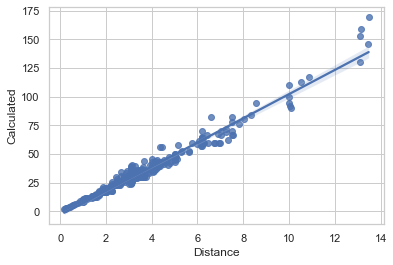

In [132]:
axes = sns.regplot(x=df.Distance, y=df.Calculated)
axes.set_ylim()

## EDA FOR PLOTTING


### summary statistics

In [133]:
df.head(1)


,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
0,2022-05-11,2022-05-11,Run,656,5.0,2989,9.96,1.08,6.03,55.39,146.0,7917.0,49.816667


In [134]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 658
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Submitted   488 non-null    datetime64[ns]
 1   Workout_Date     488 non-null    datetime64[ns]
 2   Activity_Type    488 non-null    object        
 3   Calories_Burned  488 non-null    int64         
 4   Distance         488 non-null    float64       
 5   Workout_Time     488 non-null    int64         
 6   Avg_Pace         488 non-null    float64       
 7   Max_Pace         488 non-null    float64       
 8   Avg_Speed        488 non-null    float64       
 9   Max_Speed        488 non-null    float64       
 10  Avg_Heart_Rate   488 non-null    float64       
 11  Steps            488 non-null    float64       
 12  Calculated       488 non-null    float64       
dtypes: datetime64[ns](2), float64(8), int64(2), object(1)
memory usage: 53.4+ KB


In [135]:
df.columns

Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated'],
      dtype='object')

<AxesSubplot:xlabel='Workout_Date'>

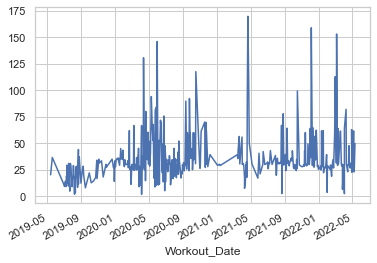

In [136]:
# show data of one subject
mask1 = df['Activity_Type'] == 'Run'
(
    df[mask1]
    .set_index('Workout_Date')
    ['Calculated']
    .plot()
)

### plot the average of `Calculated` data


<AxesSubplot:xlabel='Workout_Date'>

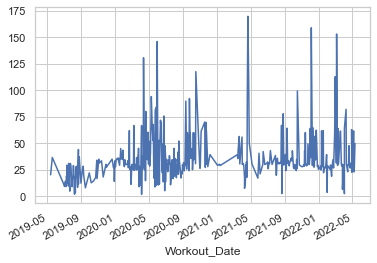

In [137]:
# basic approach to plot using matplotlib w/ chaining approach
(
    df
    .set_index('Workout_Date')
    ['Calculated']
    .plot()
)

<AxesSubplot:xlabel='Workout_Date'>

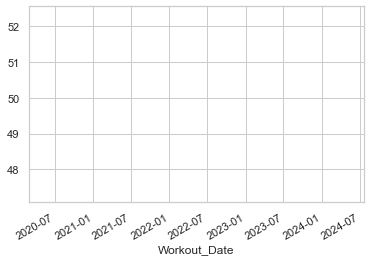

In [138]:
# check a subjects, on a particular day's data
(
    df
    .set_index('Workout_Date')
    .query('Workout_Date == 20220511')
    ['Calculated']
    .plot()
)


In [139]:
# # get the total stepcounts of a subject each day
# def get_subject_agg_each_day(Activity_Type):
#     return (
#         df.groupby(
#             ['Activity_Type'])
#         .sum()
#         [[Activity_Type]]
#         # .plot(kind='bar')
#     )


In [140]:
# get the agg of a col
group = df.groupby(
    'Date_Submitted').count(

    ).sort_values(
        by=['Workout_Date'],
         ascending=False)

In [141]:
group.head()

,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
Date_Submitted,,,,,,,,,,,,
2019-08-21,4,4,4,4,4,4,4,4,4,4,4,4
2020-03-26,3,3,3,3,3,3,3,3,3,3,3,3
2020-06-26,3,3,3,3,3,3,3,3,3,3,3,3
2020-06-29,3,3,3,3,3,3,3,3,3,3,3,3
2021-09-13,3,3,3,3,3,3,3,3,3,3,3,3


### correlation matrix / Pairplot


In [142]:
df.head(2)

,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
0,2022-05-11,2022-05-11,Run,656,5.00,2989,9.96,1.08,6.03,55.39,146.0,7917.0,49.816667
1,2022-05-09,2022-05-09,Run,391,3.11,1802,9.66,0.94,6.21,64.11,140.0,4782.0,30.033333


In [143]:
df.columns


Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated'],
      dtype='object')

### Heatmap - correlation


In [144]:
# show the correlation matrix
df.corr()


,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
Calories_Burned,1.000000,0.975330,0.972453,0.287215,-0.125555,-0.278696,0.055033,0.162761,0.966837,0.972453
Distance,0.975330,1.000000,0.982702,0.243941,-0.117924,-0.239124,0.068948,0.215664,0.985392,0.982702
Workout_Time,0.972453,0.982702,1.000000,0.388297,-0.095049,-0.377374,0.085442,0.217432,0.989893,1.000000
Avg_Pace,0.287215,0.243941,0.388297,1.000000,0.062287,-0.989500,0.060845,0.169652,0.345034,0.388297
Max_Pace,-0.125555,-0.117924,-0.095049,0.062287,1.000000,-0.074986,-0.082557,0.092156,-0.122897,-0.095049
Avg_Speed,-0.278696,-0.239124,-0.377374,-0.989500,-0.074986,1.000000,-0.059262,-0.183847,-0.340619,-0.377374
Max_Speed,0.055033,0.068948,0.085442,0.060845,-0.082557,-0.059262,1.000000,0.094448,0.086298,0.085442
Avg_Heart_Rate,0.162761,0.215664,0.217432,0.169652,0.092156,-0.183847,0.094448,1.000000,0.217389,0.217432
Steps,0.966837,0.985392,0.989893,0.345034,-0.122897,-0.340619,0.086298,0.217389,1.000000,0.989893
Calculated,0.972453,0.982702,1.000000,0.388297,-0.095049,-0.377374,0.085442,0.217432,0.989893,1.000000


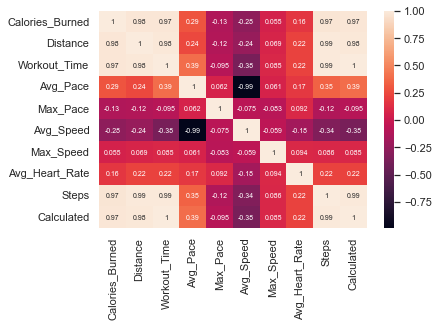

In [145]:
# show the correlation heatmap

# library
import seaborn as sns
import pandas as pd
import numpy as np

# Default heatmap
p1 = sns.heatmap(
    df
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)


In [146]:
# show columns
df.columns


Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated'],
      dtype='object')

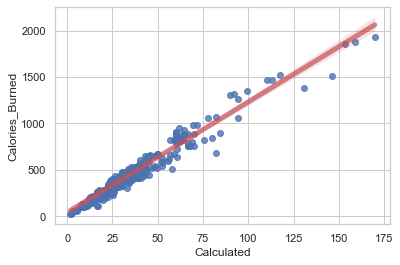

In [147]:
# Linear regression b/w steps count and movement intensity
import seaborn as sns
import matplotlib.pyplot as plt

# plot
sns.regplot(x=df["Calculated"], y=df["Calories_Burned"],
            line_kws={"color": "r", "alpha": 0.7, "lw": 5})
plt.show()


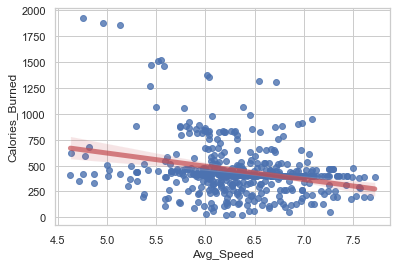

In [148]:
# Linear regression b/w steps count and movement intensity
import seaborn as sns
import matplotlib.pyplot as plt

# plot
sns.regplot(x=df["Avg_Speed"], y=df["Calories_Burned"],
            line_kws={"color": "r", "alpha": 0.7, "lw": 5})
plt.show()


In [149]:
df.columns

Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated'],
      dtype='object')

<AxesSubplot:>

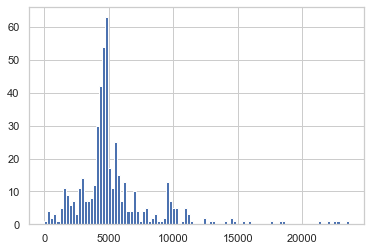

In [150]:
mask1 = df['Steps'] == 0  # get the rows where steps count is 0
df[~mask1]['Steps'].hist(bins=100)


In [151]:
df2 = df[['Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max_Speed', 'Avg_Heart_Rate', 'Steps',
       'Calculated']]
df2.corr()

,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
Calories_Burned,1.000000,0.975330,0.972453,0.287215,-0.125555,-0.278696,0.055033,0.162761,0.966837,0.972453
Distance,0.975330,1.000000,0.982702,0.243941,-0.117924,-0.239124,0.068948,0.215664,0.985392,0.982702
Workout_Time,0.972453,0.982702,1.000000,0.388297,-0.095049,-0.377374,0.085442,0.217432,0.989893,1.000000
Avg_Pace,0.287215,0.243941,0.388297,1.000000,0.062287,-0.989500,0.060845,0.169652,0.345034,0.388297
Max_Pace,-0.125555,-0.117924,-0.095049,0.062287,1.000000,-0.074986,-0.082557,0.092156,-0.122897,-0.095049
Avg_Speed,-0.278696,-0.239124,-0.377374,-0.989500,-0.074986,1.000000,-0.059262,-0.183847,-0.340619,-0.377374
Max_Speed,0.055033,0.068948,0.085442,0.060845,-0.082557,-0.059262,1.000000,0.094448,0.086298,0.085442
Avg_Heart_Rate,0.162761,0.215664,0.217432,0.169652,0.092156,-0.183847,0.094448,1.000000,0.217389,0.217432
Steps,0.966837,0.985392,0.989893,0.345034,-0.122897,-0.340619,0.086298,0.217389,1.000000,0.989893
Calculated,0.972453,0.982702,1.000000,0.388297,-0.095049,-0.377374,0.085442,0.217432,0.989893,1.000000


### ML

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
#Check for null values before testing/training
df2.isnull().sum()

Calories_Burned    0
Distance           0
Workout_Time       0
Avg_Pace           0
Max_Pace           0
Avg_Speed          0
Max_Speed          0
Avg_Heart_Rate     0
Steps              0
Calculated         0
dtype: int64

In [155]:
X = df2.loc[:, ['Distance']].values

In [156]:
# verify the shape of the array (rows by a single column)
X.shape

(488, 1)

In [157]:
y = df.loc[:, 'Avg_Pace'].values

In [158]:
#verify the shape of the y array
y.shape

(488,)

In [159]:
#load the linear regression value
reg = LinearRegression(fit_intercept=True)

In [160]:
#set our fit with our arrays
reg.fit(X,y)

LinearRegression()

In [161]:
reg.predict(X[0].reshape(-1,1))

array([9.67999935])

In [162]:
reg.predict(X[0:2])

array([9.67999935, 9.47037242])

In [163]:
score = reg.score(X, y)
print(score)

0.05950704696345055


In [164]:
reg.coef_

array([0.11091372])

In [165]:
reg.intercept_

9.12543074462507

In [166]:
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

formula: y = 0.11x + 9.13


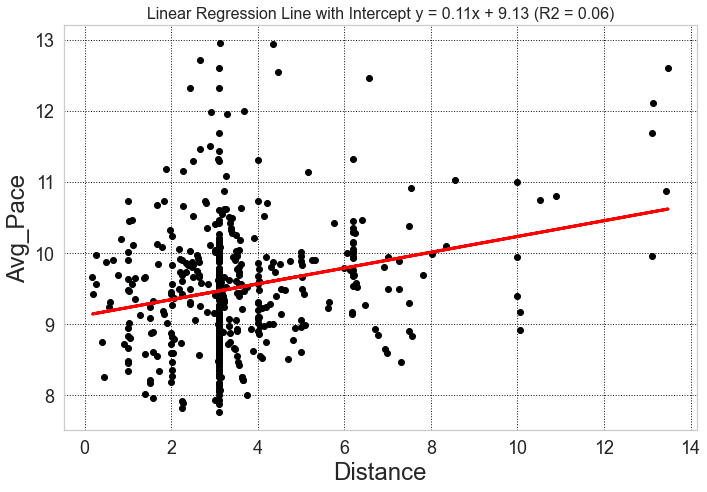

In [167]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('Distance', fontsize = 24)
ax.set_ylabel('Avg_Pace', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

### Plotting with and without intercept

In [168]:
# Model with Intercept (like earlier in notebook)
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

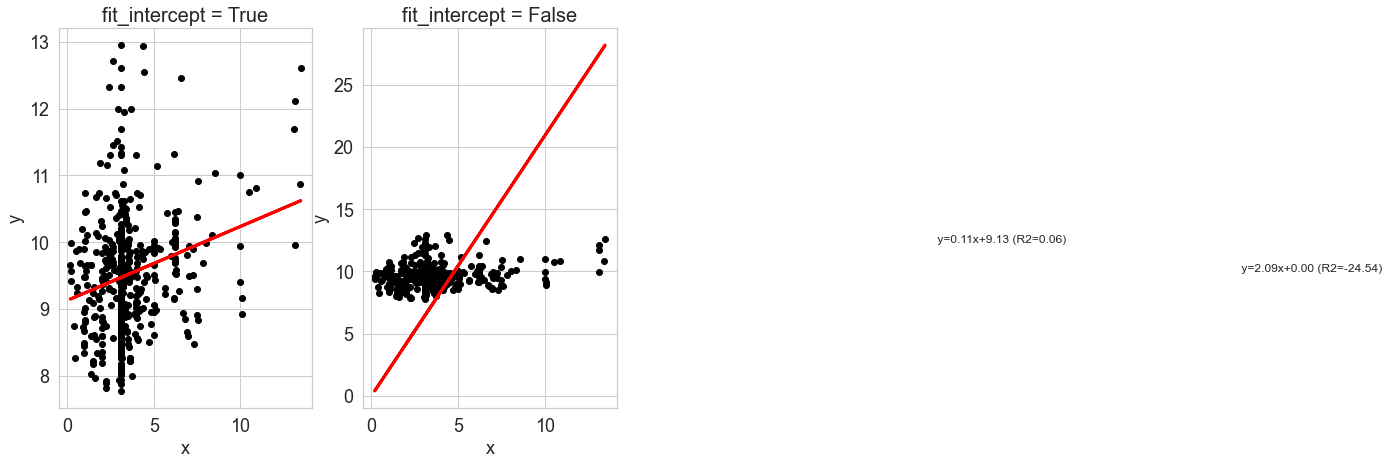

In [169]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    #ax[index].set_xlim(left = 0, right = 150)
   # ax[index].set_ylim(bottom = 0)
    
    ax[index].text(50, 10, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()

### Train Test Split

In [170]:
df2.head()

,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
0,656,5.00,2989,9.96,1.08,6.03,55.39,146.00,7917.0,49.816667
1,391,3.11,1802,9.66,0.94,6.21,64.11,140.00,4782.0,30.033333
2,313,2.35,1376,9.74,1.03,6.16,58.29,156.00,3622.0,22.933333
3,348,2.59,1516,9.75,0.43,6.16,140.98,154.00,4043.0,25.266667
4,430,3.10,1974,10.61,0.00,5.65,0.00,105.74,5197.0,32.900000


In [171]:
X_train, X_test, y_train, y_test = train_test_split(df[['Distance']], df['Avg_Pace'], random_state=0)

In [172]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

# Train the model on the training set.
reg.fit(X_train, y_train)

LinearRegression()

In [173]:
# Test the model on the testing set and evaluate the performance
score = reg.score(X_test, y_test)
print(score)

0.041604227405819594


### Regression

<AxesSubplot:xlabel='Distance', ylabel='Avg_Pace'>

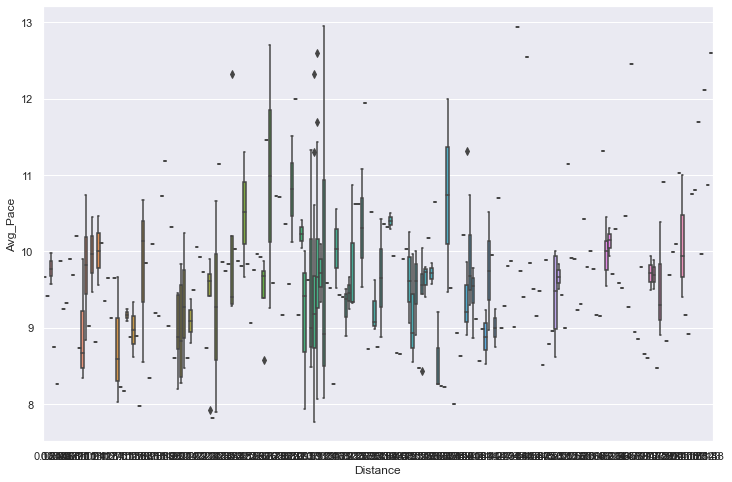

In [174]:
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.boxplot(x='Distance', y='Avg_Pace', data=df2)

In [175]:
dummy_variables = pd.get_dummies(df2[['Distance','Avg_Pace','Calories_Burned']], drop_first=True)
dummy_variables.shape
(2394, 57)
dummy_variables.head()

,Distance,Avg_Pace,Calories_Burned
0,5.00,9.96,656
1,3.11,9.66,391
2,2.35,9.74,313
3,2.59,9.75,348
4,3.10,10.61,430


In [176]:
from sklearn.preprocessing import MinMaxScaler 

In [177]:
num_features = df2[['Distance', 'Avg_Pace', 'Workout_Time', 'Calories_Burned']]
sc = MinMaxScaler()
num_features = sc.fit_transform(num_features)

In [178]:
cat_features = dummy_variables.values
data = np.concatenate((cat_features, num_features), axis=1)
X = data[:, :data.shape[1]-1]
y = data[:, data.shape[1]-1]
print(X.shape)
print(y.shape)
(2394, 60)
(2394,)

(488, 6)
(488,)


(2394,)

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [180]:
from sklearn.linear_model import Ridge
#Create a ridge regressor object
ridge = Ridge(alpha=0.5)
#Train the model
ridge.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training):{:.3f}'.
format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(ridge.score(X_test, y_test)))

R-squared score (training):1.000
R-squared score (test): 1.000


In [181]:
from sklearn.ensemble import GradientBoostingRegressor
#Create a GradientBoostingRegressor object
params = {'n_estimators': 600, 'max_depth': 5,
'learning_rate': 0.02, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
#Train the model
gbr.fit(X_train, y_train)
#Evaluate the model
print('R-squared score (training): {:.3f}'
.format(gbr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
.format(gbr.score(X_test, y_test)))

R-squared score (training): 1.000
R-squared score (test): 0.993


## Pairplot

In [182]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# standard imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import *
# pipelines
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
# data preparation
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
# machine learning
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor

In [183]:
run_num = df.select_dtypes(include = ['float64', 'int64'])
run_num_corr = run_num.corr()['Distance'][:-1]
top_features = run_num_corr[abs(run_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 4 strongly correlated values with SalePrice:
Distance           1.000000
Steps              0.985392
Workout_Time       0.982702
Calories_Burned    0.975330
Name: Distance, dtype: float64


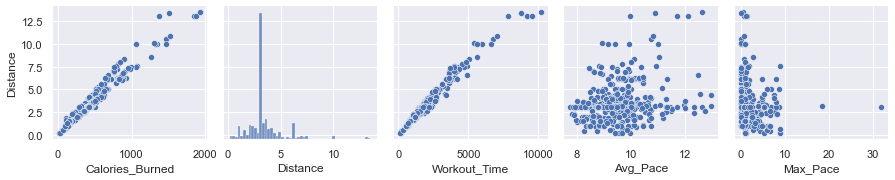

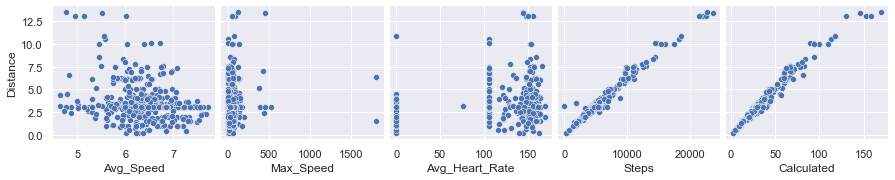

In [184]:
for i in range(0, len(run_num.columns), 5):
    sns.pairplot(data=run_num,
                x_vars=run_num.columns[i:i+5],
                y_vars=['Distance'])

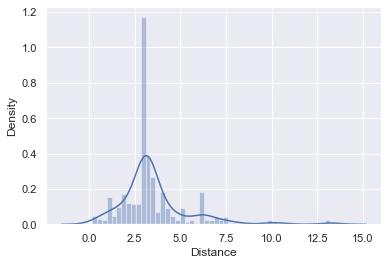

In [185]:
sp_untransformed = sns.distplot(df2['Distance'])

In [186]:
print("Skewness: %f" % df2['Distance'].skew())

Skewness: 2.105603


In [187]:
log_transformed = np.log(df2['Distance'])

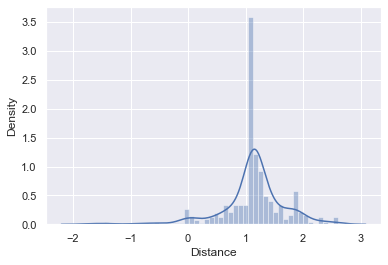

In [188]:
sp_transformed = sns.distplot(log_transformed)

In [189]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -1.181946


In [190]:
duplicate = df2[df2.duplicated(['Workout_Time'])]
duplicate

,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
14,393,3.11,1659,8.89,0.95,6.75,63.43,150.00,4440.0,27.650000
16,403,3.10,1659,8.92,0.00,6.73,0.00,105.74,4444.0,27.650000
61,404,3.11,1727,9.26,0.45,6.48,134.38,160.00,4630.0,28.783333
73,403,3.10,1647,8.85,31.95,6.78,1.88,158.00,4217.0,27.450000
76,406,3.10,1704,9.16,0.00,6.55,0.00,105.74,4551.0,28.400000
...,...,...,...,...,...,...,...,...,...,...
547,403,3.10,1631,8.77,0.83,6.84,71.98,0.00,4376.0,27.183333
564,131,1.01,537,8.84,4.44,6.79,13.52,0.00,1459.0,8.950000
568,407,3.10,1720,9.26,5.25,6.48,11.43,0.00,4711.0,28.666667
571,354,2.63,1557,9.87,6.55,6.08,9.16,0.00,4214.0,25.950000


In [194]:
df2.head()

,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Calculated
0,656,5.00,2989,9.96,1.08,6.03,55.39,146.00,7917.0,49.816667
1,391,3.11,1802,9.66,0.94,6.21,64.11,140.00,4782.0,30.033333
2,313,2.35,1376,9.74,1.03,6.16,58.29,156.00,3622.0,22.933333
3,348,2.59,1516,9.75,0.43,6.16,140.98,154.00,4043.0,25.266667
4,430,3.10,1974,10.61,0.00,5.65,0.00,105.74,5197.0,32.900000


In [196]:
AHR0 = df2[['Avg_Heart_Rate']] < 0.1
AHR = df2[['Avg_Heart_Rate']].mean().round(2)
AHR

Avg_Heart_Rate    116.18
dtype: float64

In [ ]:
X = df.drop('Distance',axis=1)
y = df.Distance
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
y_train.value_counts()

In [ ]:
y_train_1.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [ ]:
sns.pairplot(df2, vars = df2.columns[0:4])

In [ ]:
knn.fit(X=X_train, y=y_train)

In [ ]:
for column in df2:
    sns.displot(x=column, data=df2)

In [ ]:
df.columns

In [ ]:
# Convert x column to numpy array
X = df2.loc[:, ['Calories_Burned']].values

In [ ]:
sns.displot(X, kind='kde')

In [ ]:
sns.displot(X, kde=True)

In [ ]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
x = np.random.normal(size=1000)

#create normal distribution histogram
sns.displot(X)

In [ ]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
#X = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(X, kind='kde')

In [ ]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
#x = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(df2, x='Calculated', kde=True)

In [ ]:
sns.pairplot(data = df, vars = df.columns[3:9], hue = 'Calculated')

In [ ]:
df2.info()